In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.fft import fft
from skimage import feature
import scipy

In [2]:
df = pd.read_csv('../data/train_cursor.csv')
df['pos'] = df['cursor_position']% 30
df['line'] = (df['cursor_position']/30).astype(int)

In [4]:
# Optimize the function to calculate top N frequencies and their magnitudes for each 'id' using groupby and apply
def calculate_fft(group):
    # Perform Fourier Transform on 'pos'
    fft_values = fft(group['pos'])[1:]
    
    # Generate frequencies corresponding to the Fourier Transform values
    frequencies = np.fft.fftfreq(len(fft_values), 1)[1:]
    
    # Take absolute value to get magnitude
    fft_magnitude = np.abs(fft_values)
    
    # Identify indices where the frequencies are positive
    positive_indices = np.where(frequencies > 0)[0]
    
    # Filter out only positive frequencies and skip the zero frequency
    positive_frequencies = frequencies[positive_indices]
    positive_magnitudes = fft_magnitude[positive_indices]
    
    # Extract top N positive frequencies and their magnitudes
    # top_positive_frequencies = positive_frequencies[np.argsort(positive_magnitudes)[-N:]]
    # top_positive_magnitudes = np.sort(positive_magnitudes)[-N:]
    
    return pd.Series({
        'frequencies': list(positive_frequencies),
        'magnitudes': list(positive_magnitudes)
    })

In [5]:
# Use groupby and apply to optimize the calculation
df = df.groupby('id').apply(calculate_fft).reset_index()

In [23]:
image = np.array(df.loc[30]['top_magnitudes'])

contrast_manual = np.mean(np.abs(np.diff(image)))

# 5. Image Moments
# We'll use numpy and scipy.stats to calculate statistical moments
mean_moment_manual = np.mean(image)
variance_moment_manual = np.var(image)
skewness_moment_manual = scipy.stats.skew(image)
kurtosis_moment_manual = scipy.stats.kurtosis(image)

contrast_manual, mean_moment_manual, variance_moment_manual, skewness_moment_manual, kurtosis_moment_manual

(172.74423048857105,
 285.02210083300764,
 113710.67697961768,
 3.710151726911117,
 21.459524329234476)

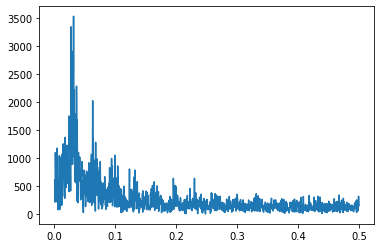

In [15]:
idx = 110
plt.plot(df.loc[idx]['top_frequencies'], df.loc[idx]['top_magnitudes'])

(array([1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        2.400e+01, 2.190e+02, 7.170e+02, 1.506e+03]),
 array([0.49765258, 0.49788344, 0.4981143 , 0.49834516, 0.49857602,
        0.49880687, 0.49903773, 0.49926859, 0.49949945, 0.49973031,
        0.49996117]),
 <BarContainer object of 10 artists>)

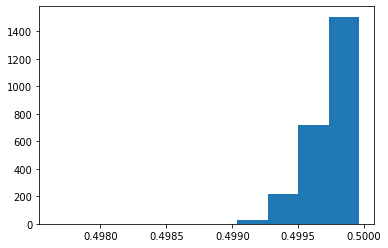

In [8]:
plt.hist(df['top_frequencies'].apply(lambda x: np.max(x)))